# Forex Renko Charts using Intraday data

This code plots the end of day forex renko charts in Python. It makes use of the mplfinance and the investpy packages.

For more information visit:
- 

To install the packages visit: 
- mplfinance: https://pypi.org/project/mplfinance/ 

## Import packages
Import
- pandas (For dataframe & csv handling)
- mplfinance (For rendering the renko charts)

In [1]:
import pandas as pd
import mplfinance as fplt

## Read csv file
- Read the CSV file that you have downloaded from the Metatrader 4 terminal history download window
- Rename the columns to the below format and read the first five and last five rows of the dataframe

In [2]:
df = pd.read_csv('EURUSD60.csv', names=["date", "time", "open", "high", "low", "close", "volume"],parse_dates=True)
print("\nPrinting the first five rows of the dataframe")
df.head()


Printing the first five rows of the dataframe


,date,time,open,high,low,close,volume
0,1971.01.04,00:00,0.5369,0.5369,0.5369,0.5369,1
1,1971.01.05,00:00,0.5366,0.5366,0.5366,0.5366,1
2,1971.01.06,00:00,0.5365,0.5365,0.5365,0.5365,1
3,1971.01.07,00:00,0.5368,0.5368,0.5368,0.5368,1
4,1971.01.08,00:00,0.5371,0.5371,0.5371,0.5371,1


In [3]:
print("\nPrinting the last five rows of the dataframe")
df.tail()


Printing the last five rows of the dataframe


,date,time,open,high,low,close,volume
146555,2021.07.09,19:00,1.18602,1.18696,1.18600,1.18681,2040
146556,2021.07.09,20:00,1.18681,1.18734,1.18671,1.18732,1313
146557,2021.07.09,21:00,1.18732,1.18776,1.18718,1.18764,1419
146558,2021.07.09,22:00,1.18764,1.18801,1.18747,1.18798,1303
146559,2021.07.09,23:00,1.18798,1.18811,1.18779,1.18787,885


## Clean and Merge the date and time columns into a new  date_time column
- Since the date column uses a yyyy.mm.dd format, using str.replace, we change it to yyyy-mm-dd format
- Next, we combine the date and time columns to get it into a date/time format

In [6]:
df['date'] = df['date'].str.replace('.', '-', regex=True)
df['date_time'] = df['date'] + ' ' + df['time']
df.head()

,date,time,open,high,low,close,volume,date_time
0,1971-01-04,00:00,0.5369,0.5369,0.5369,0.5369,1,1971-01-04 00:00
1,1971-01-05,00:00,0.5366,0.5366,0.5366,0.5366,1,1971-01-05 00:00
2,1971-01-06,00:00,0.5365,0.5365,0.5365,0.5365,1,1971-01-06 00:00
3,1971-01-07,00:00,0.5368,0.5368,0.5368,0.5368,1,1971-01-07 00:00
4,1971-01-08,00:00,0.5371,0.5371,0.5371,0.5371,1,1971-01-08 00:00


## Drop the unwanted columns (date, time and volume)

In [8]:
df.drop(columns = ['date','time','volume'], inplace=True)
df.head()

,open,high,low,close,date_time
0,0.5369,0.5369,0.5369,0.5369,1971-01-04 00:00
1,0.5366,0.5366,0.5366,0.5366,1971-01-05 00:00
2,0.5365,0.5365,0.5365,0.5365,1971-01-06 00:00
3,0.5368,0.5368,0.5368,0.5368,1971-01-07 00:00
4,0.5371,0.5371,0.5371,0.5371,1971-01-08 00:00


Check for the dtypes

In [10]:
df.dtypes

open         float64
high         float64
low          float64
close        float64
date_time     object
dtype: object

Convert the date_time column to the datetime format

In [11]:
df = df.astype({'date_time':'datetime64[ns]'})

Print out the dtypes again to see the change on the date_time column

In [12]:
df.dtypes

open                float64
high                float64
low                 float64
close               float64
date_time    datetime64[ns]
dtype: object

## Filter out all data before 2015-01-01 and set date_time as index

In [13]:
filt = df[(df['date_time'] > '2014-12-31 23:59')]
filt.set_index('date_time',inplace=True)

In [17]:
# Print the tail end of the filt dataframe
print(filt.head())
print(filt.tail())

                        open     high      low    close
date_time                                              
2015-01-02 09:00:00  1.20538  1.20576  1.20344  1.20553
2015-01-02 10:00:00  1.20554  1.20690  1.20443  1.20467
2015-01-02 11:00:00  1.20467  1.20600  1.20385  1.20573
2015-01-02 12:00:00  1.20574  1.20574  1.20418  1.20503
2015-01-02 13:00:00  1.20503  1.20577  1.20443  1.20535
                        open     high      low    close
date_time                                              
2021-07-09 19:00:00  1.18602  1.18696  1.18600  1.18681
2021-07-09 20:00:00  1.18681  1.18734  1.18671  1.18732
2021-07-09 21:00:00  1.18732  1.18776  1.18718  1.18764
2021-07-09 22:00:00  1.18764  1.18801  1.18747  1.18798
2021-07-09 23:00:00  1.18798  1.18811  1.18779  1.18787


## Plot the intraday forex renko chart

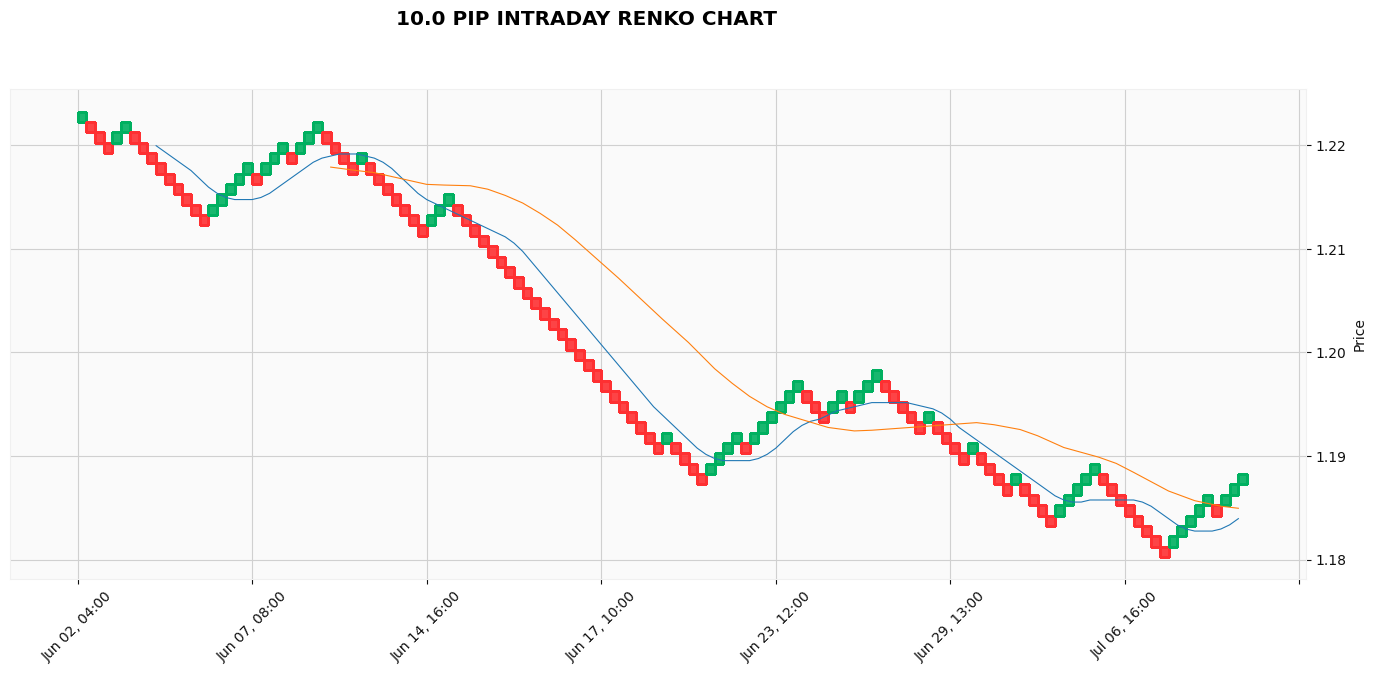

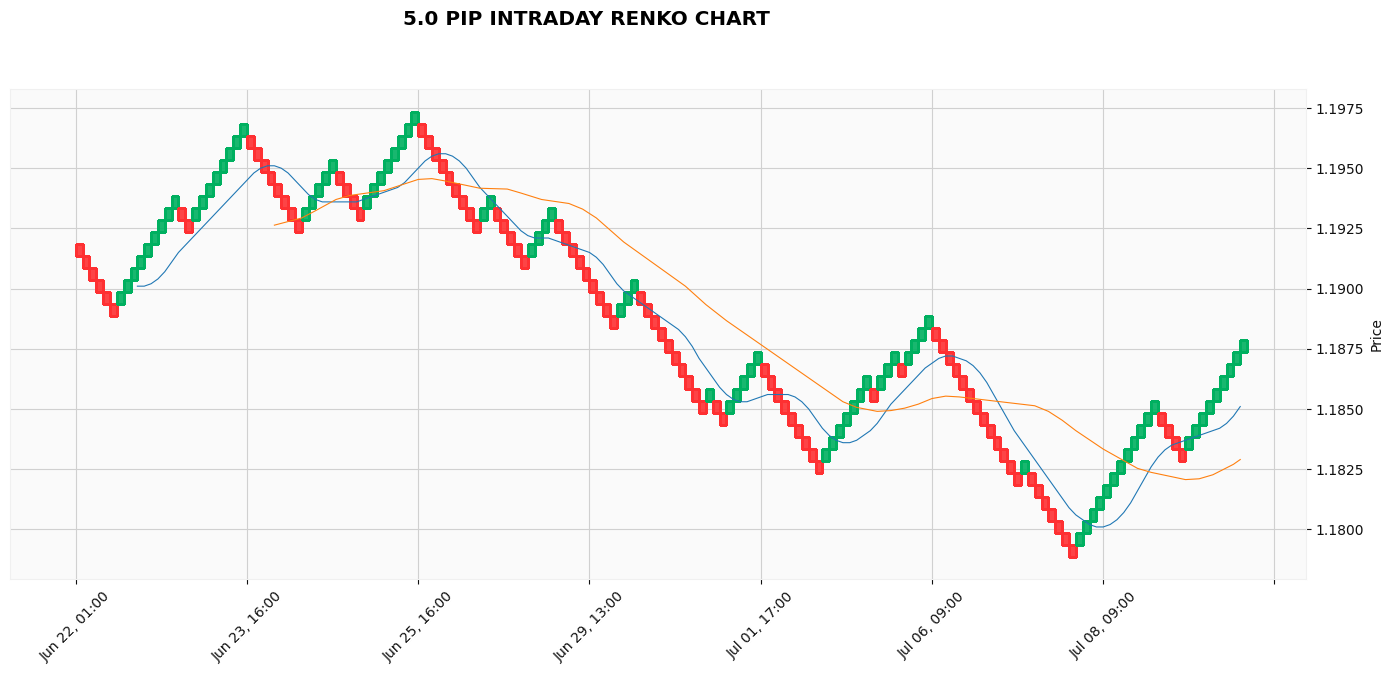

In [23]:
size1 = 0.001
size2 = 0.0005

fplt.plot(filt['2021-06-01 23:00:00':'2021-07-09 23:00:00'],type='renko',renko_params=dict(brick_size=size1),\
          mav = (10,30),style='yahoo',figsize =(18,7), \
          title = "{0} PIP INTRADAY RENKO CHART".format(size1*10000))

fplt.plot(filt['2021-06-21 23:00:00':'2021-07-09 23:00:00'],type='renko',renko_params=dict(brick_size=size2),\
          mav = (10,30),style='yahoo',figsize =(18,7), \
          title = "{0} PIP INTRADAY RENKO CHART".format(size2*10000))